In [ ]:
!unzip /content/drive/MyDrive/Sign-Language-Digits-Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1936.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1937.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1938.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1939.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y194.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1940.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1941.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1942.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1943.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1944.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1945.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1946.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1947.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1948.jpg  
  inflating: Sign-Language-Digits-Dataset/Dataset/Y/Y1

In [ ]:
!pip install tqdm

In [ ]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

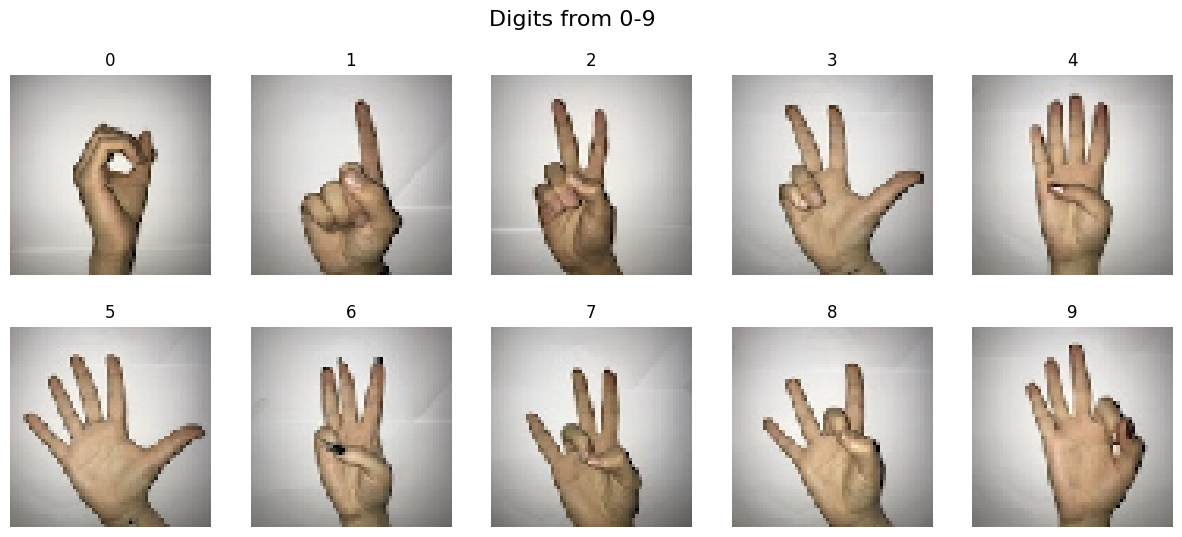

In [ ]:
try:
    import string
    nrow, ncol = 2, 5
    plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)

    fig, axs = plt.subplots(nrow, ncol)
    fig.suptitle('Digits from 0-9', fontsize=16)

    for row in range(nrow):
        for col in range(ncol):
            img_index = row*ncol+col

            img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(img_index) + '.JPG', target_size = (64, 64))
            plt.subplot(nrow, ncol, img_index + 1)
            plt.imshow(img)
            plt.title(img_index)
            plt.axis('off')




except Exception as e:
    pass

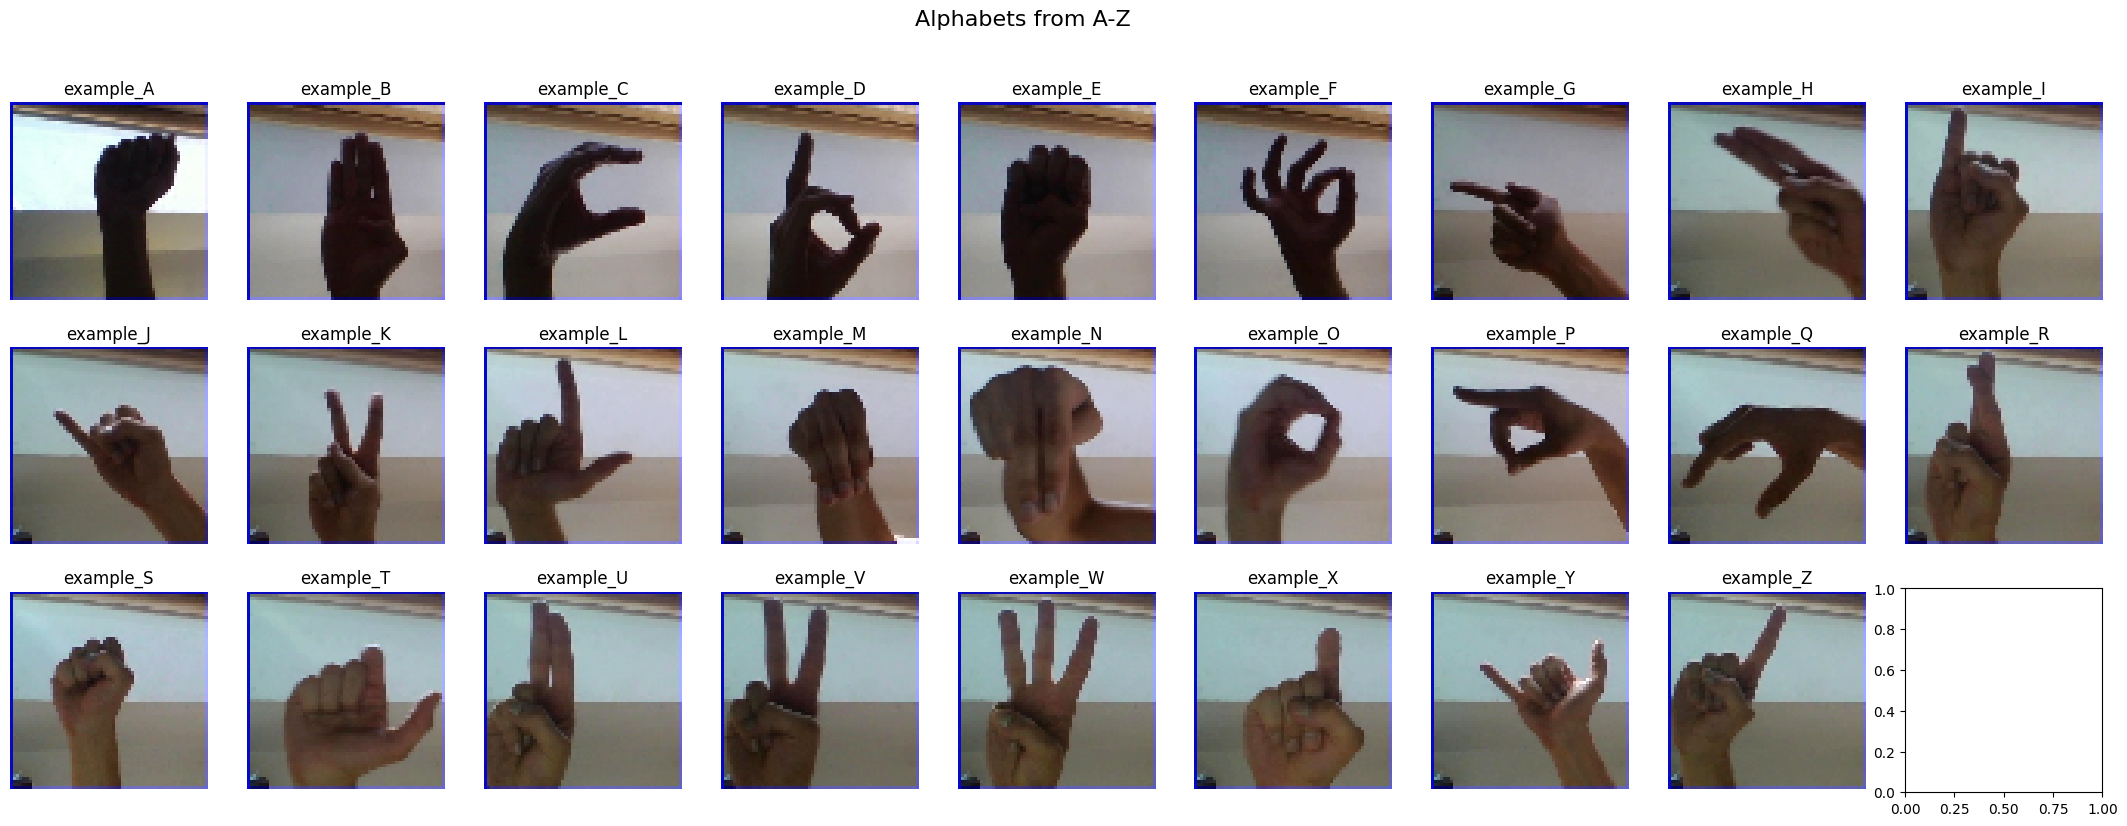

In [ ]:
try:
    def show_alphabets(directory_path, prefix, nrow, ncol):
        plt.rcParams['figure.figsize'] = (ncol * 3, nrow * 3)

        fig, axs = plt.subplots(nrow, ncol)
        fig.suptitle('Alphabets from A-Z', fontsize=16)

        for row in range(nrow):
            for col in range(ncol):
                img_index = row * ncol + col
                img_path = os.path.join(directory_path, f'{prefix}_{chr(ord("A") + img_index)}.JPG')
                img = image.load_img(img_path, target_size=(64, 64))
                plt.subplot(nrow, ncol, img_index + 1)
                plt.imshow(img)
                plt.title(f'{prefix}_{chr(ord("A") + img_index)}')
                plt.axis('off')

    directory_path = 'Sign-Language-Digits-Dataset/Examples'

    show_alphabets(directory_path, 'example', 3, 9)
    plt.show()
except Exception as e:
    pass

In [ ]:
DATASET_PATH = '/content/Sign-Language-Digits-Dataset/Dataset'

In [ ]:
train_set = {}
validation_set = {}
test_set = {}
for cat in os.listdir(DATASET_PATH):
  cat_dir = os.path.join(DATASET_PATH, cat) # e.g. DATASET_PATH/'0'
  cat_files = os.listdir(cat_dir)

  train_l , test_l = train_test_split(cat_files, test_size = 0.3) # Training set's size is 70% of the data

  val_l, test_l = train_test_split(test_l, test_size = 0.5) # Validation set's and Test set's size are both 15% of the data
  train_set[cat] = train_l
  validation_set[cat] = val_l
  test_set[cat] = test_l

In [ ]:

try:
  for c in tqdm(train_set.keys()):
    c_dir = os.path.join(DATASET_PATH, 'training_set', 'class_0' + str(c))
    os.makedirs(c_dir)
    for file in train_set[c]:
      source = os.path.join(DATASET_PATH, c, file)

      d = os.path.join(c_dir, file)
      copyfile(source, d)

except Exception as e:
  print(e,'Already Splitted')

100%|██████████| 39/39 [00:04<00:00,  8.87it/s]


In [ ]:
try:
  for c in tqdm(validation_set.keys()):
    c_dir = os.path.join(DATASET_PATH, 'validation_set', 'class_0' + str(c))
    os.makedirs(c_dir)
    for file in validation_set[c]:
      source = os.path.join(DATASET_PATH, c, file)
      d = os.path.join(c_dir, file)
      copyfile(source, d)
except Exception as e:
  print(e)

100%|██████████| 39/39 [00:06<00:00,  6.49it/s]


In [ ]:
for c in tqdm(test_set.keys()):
  c_dir = os.path.join(DATASET_PATH, 'test_set', 'class_0' + str(c))
  os.makedirs(c_dir)
  for file in test_set[c]:
    source = os.path.join(DATASET_PATH, c, file)
    d = os.path.join(c_dir, file)
    copyfile(source, dest)

100%|██████████| 39/39 [00:06<00:00,  6.27it/s]


In [ ]:
for i in range(11):
  train_s = len(train_set[str(i)])
  validation_s = len(validation_set[str(i)])
  test_s = len(test_set[str(i)])
  print("0{} : Training size({}) Validation size({}) Test size({})".format(i, train_s, validation_s, test_s))

00 : Training size(61) Validation size(72) Test size(72)
01 : Training size(61) Validation size(72) Test size(73)
02 : Training size(61) Validation size(72) Test size(73)
03 : Training size(61) Validation size(72) Test size(73)
04 : Training size(62) Validation size(72) Test size(73)
05 : Training size(62) Validation size(72) Test size(73)
06 : Training size(62) Validation size(72) Test size(73)
07 : Training size(61) Validation size(72) Test size(73)
08 : Training size(62) Validation size(73) Test size(73)
09 : Training size(61) Validation size(71) Test size(72)


KeyError: ignored

In [ ]:
# DATA AUGEMNTATION STEP.
tr_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# VALIDARION STEP
val_datagenerator = ImageDataGenerator(rescale = 1./255)


ts_datagenerator = ImageDataGenerator(rescale = 1./255)

training_data = tr_datagenerator.flow_from_directory(os.path.join(DATASET_PATH, 'training_set'),target_size = (64, 64),batch_size = 32,class_mode = 'categorical')

validation_data = val_datagenerator.flow_from_directory(os.path.join(DATASET_PATH, 'validation_set'),target_size = (64, 64),batch_size = 32, class_mode = 'categorical')

test_data = ts_datagenerator.flow_from_directory(os.path.join(DATASET_PATH, 'test_set'),target_size = (64, 64),batch_size = 32, class_mode = 'categorical')

Found 26714 images belonging to 39 classes.
Found 31170 images belonging to 39 classes.
Found 31178 images belonging to 39 classes.


In [ ]:
# CNN seq
classifier = Sequential()

# 1sy layer
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# 2nd layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# 3rd layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# flatening and full layer
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 39, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 1st try 200 epochs Time : 9hrs Timeout redeuce epoch
# 2nd try 100 epochs Time : 5hrs timeout
# 3rd attemt  reduced training data size 20% expectedt time less than 5 hrs
try:
  history = classifier.fit_generator(training_data,steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),epochs = 100, validation_data = validation_data,validation_steps = math.ceil(validation_data.n / validation_data.batch_size))
except Exception as e:
  print('Error',e)

Epoch 1/100


<ipython-input-14-20399f4b7779>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_data,steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),epochs = 100, validation_data = validation_data,validation_steps = math.ceil(validation_data.n / validation_data.batch_size))


835/835 [==============================] - 282s 336ms/step - loss: 2.8952 - accuracy: 0.1774 - val_loss: 1.9299 - val_accuracy: 0.3961
Epoch 2/100
835/835 [==============================] - 254s 304ms/step - loss: 1.6429 - accuracy: 0.4725 - val_loss: 1.1053 - val_accuracy: 0.6496
Epoch 3/100
835/835 [==============================] - 256s 306ms/step - loss: 1.1130 - accuracy: 0.6292 - val_loss: 0.7480 - val_accuracy: 0.7477
Epoch 4/100
835/835 [==============================] - 280s 335ms/step - loss: 0.8429 - accuracy: 0.7135 - val_loss: 0.5231 - val_accuracy: 0.8284
Epoch 5/100
835/835 [==============================] - 279s 334ms/step - loss: 0.6849 - accuracy: 0.7666 - val_loss: 0.3696 - val_accuracy: 0.8808
Epoch 6/100
835/835 [==============================] - 282s 338ms/step - loss: 0.5885 - accuracy: 0.7955 - val_loss: 0.3255 - val_accuracy: 0.9010
Epoch 7/100
835/835 [==============================] - 253s 303ms/step - loss: 0.5173 - accuracy: 0.8224 - val_loss: 0.2575 - val_

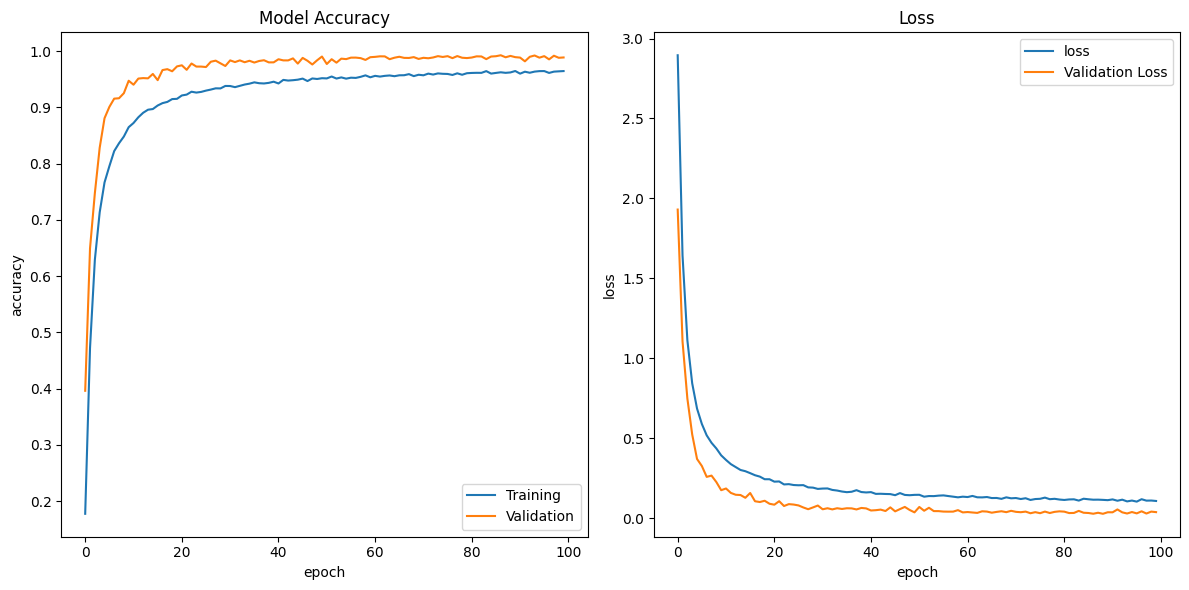

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'Validation Loss'])

plt.tight_layout()
plt.show()


In [ ]:
# 1st attempt accuracy : 100% overfitting expected
# 2nd aattempt : timeout
t_loss, t_acc = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(t_acc))

<ipython-input-18-2f8d890b9def>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))


Accuracy on test set : 0.9880685210227966


1/1 [==============================] - 0s 232ms/step


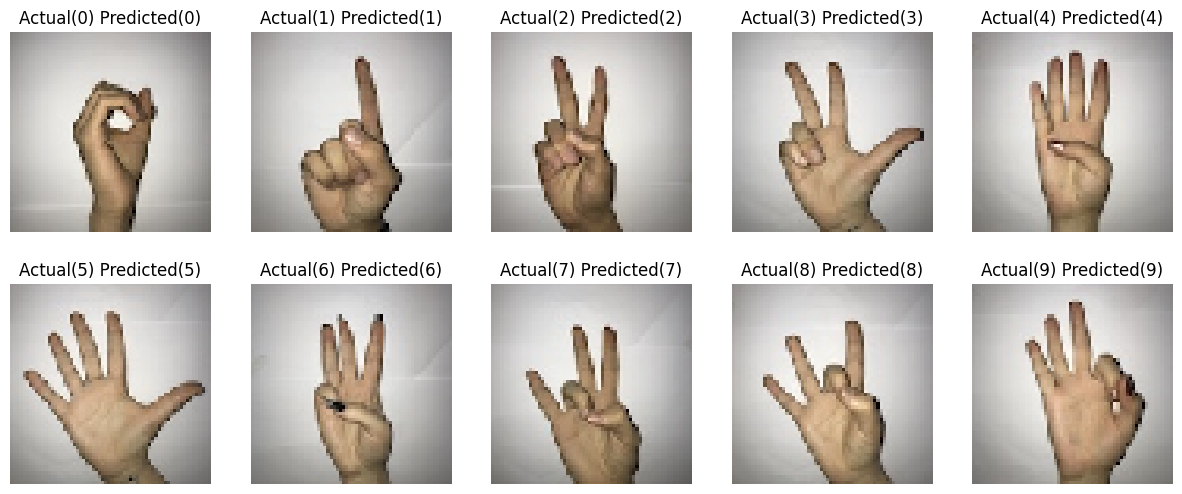

In [ ]:
nrow, ncol = 2, 5
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(nrow):
    for col in range(ncol):
        index = row*ncol+col
        img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(index) + '.JPG', target_size = (64, 64))
        t_img = image.img_to_array(img) # converting to array
        t_img = np.expand_dims(t_img, axis = 0)
        # predict image using classifier
        result = classifier.predict(t_img).argmax()
        plt.subplot(nrow, ncol, index + 1)
        plt.imshow(img)
        plt.title("Actual({}) Predicted({})".format(index, result))
        plt.axis('off')

In [ ]:


json_mod = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(json_mod)

classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


1/1 [==============================] - 0s 23ms/step


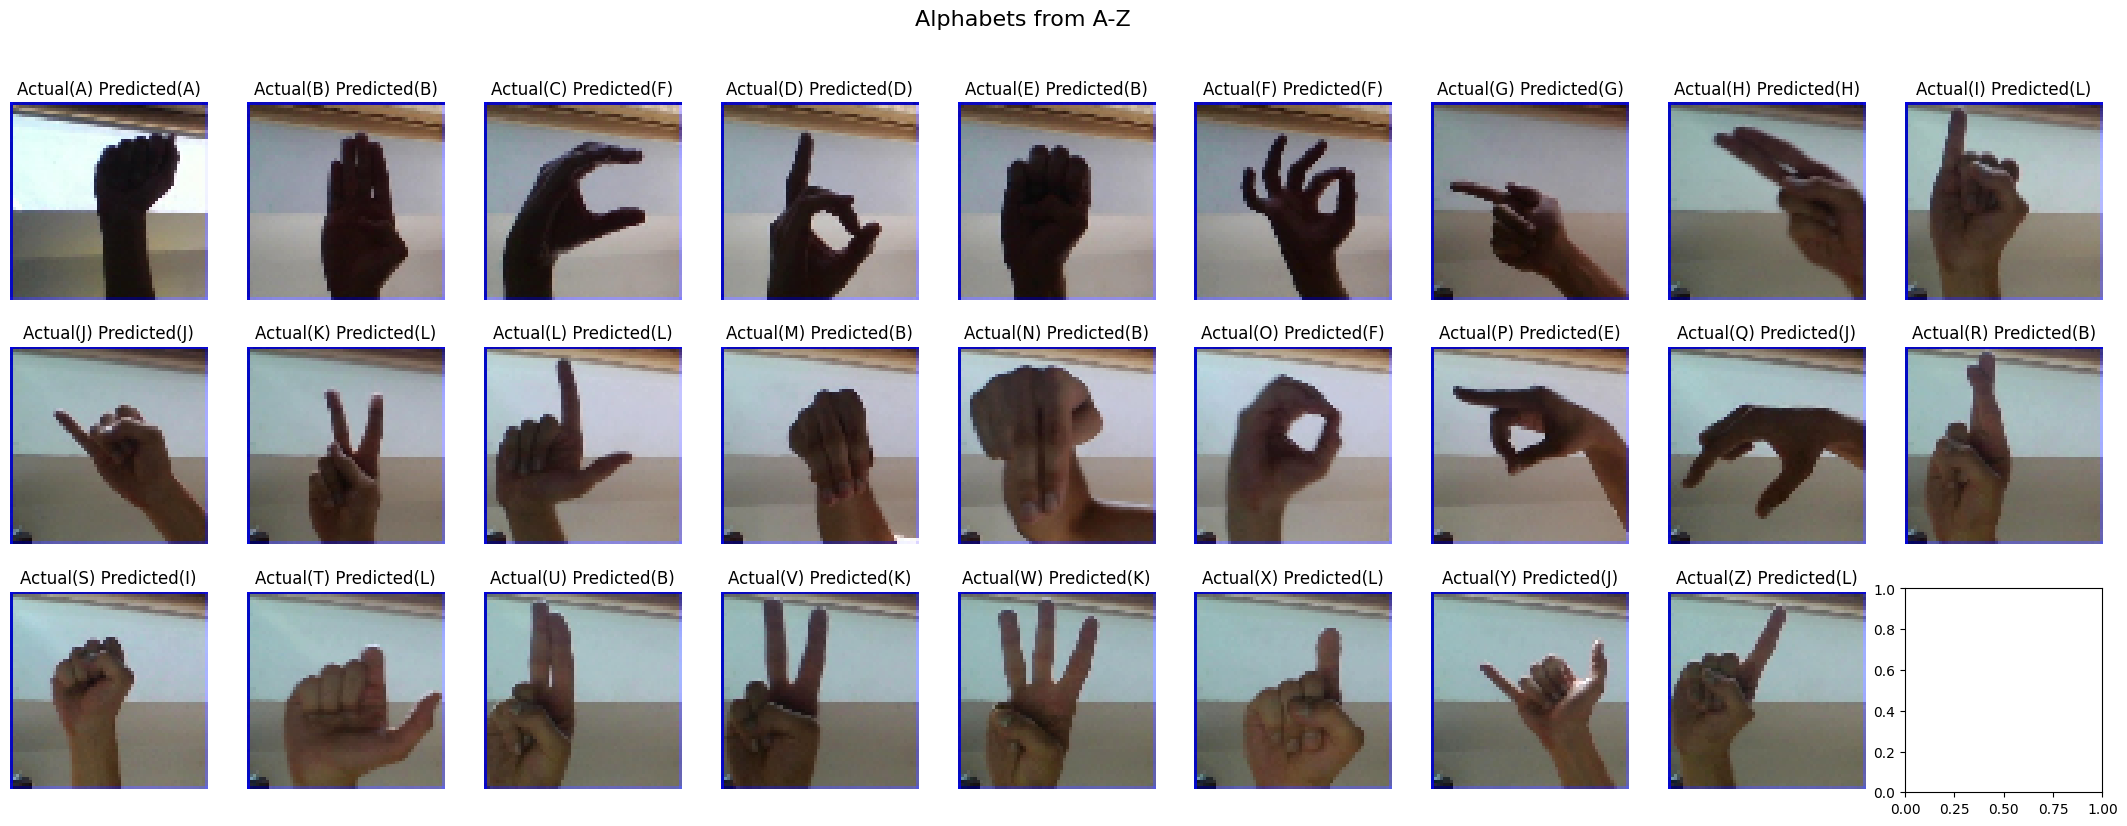

In [ ]:
prefix = 'example'
plt.rcParams['figure.figsize'] = (ncol * 3, nrow * 3)

# fig, axs = plt.subplots(nrow, ncol)
# fig.suptitle('Alphabets from A-Z', fontsize=16)
# for row in range(3):
#             for col in range(9):
#                 img_index = row * ncol + col
#                 # Load image
#                 # img = image.load_img(directory_path, f'{prefix}_{chr(ord("A") + img_index)}.JPG')
#                 # img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + {chr(ord("A") + img_index)} + '.JPG', target_size = (64, 64))
#                 img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + chr(ord("A") + img_index) + '.JPG', target_size=(64, 64))

#                 test_image = image.img_to_array(img)
#                 test_image = np.expand_dims(test_image, axis = 0)
#                 # predict image using classifier
#                 result = classifier.predict(test_image).argmax()
#                 plt.subplot(nrow, ncol, img_index + 1)
#                 plt.imshow(img)
#                 plt.title("Actual({}) Predicted({})".format(img_index, result))
#                 plt.axis('off')
alpha = {i + 10: chr(ord('A') + i) for i in range(26)}



try:
    # import os
    # from keras.preprocessing import image
    # import matplotlib.pyplot as plt
    def show_alphabets(directory_path, prefix, nrow, ncol):
        plt.rcParams['figure.figsize'] = (ncol * 3, nrow * 3)

        fig, axs = plt.subplots(nrow, ncol)
        fig.suptitle('Alphabets from A-Z', fontsize=16)

        for row in range(nrow):
            for col in range(ncol):
                img_index = row * ncol + col
                img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + chr(ord("A") + img_index) + '.JPG', target_size=(64, 64))

                test_image = image.img_to_array(img)
                test_image = np.expand_dims(test_image, axis = 0)
                # predict image using classifier
                result = classifier.predict(test_image).argmax()
                plt.subplot(nrow, ncol, img_index + 1)
                plt.imshow(img)

                # result = 1  # Replace with your actual result
                alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

                # Assuming result contains values from 1 to 26

                # Mapping result to corresponding alphabet
                predicted_alphabet = alphabets[result - 1]

                plt.title("Actual({}) Predicted({})".format(chr(ord("A") + img_index), [result]))
                plt.axis('off')




                # Load image

    # Specify the directory path
    directory_path = 'Sign-Language-Digits-Dataset/Examples'

    # Show alphabets
    show_alphabets(directory_path, 'example', 3, 9)
    plt.show()
except Exception as e:
    pass